In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
#Read files from the website


In [2]:
def add(climate_data, url, name):
    data_city= pd.read_table(url, delim_whitespace=True, names=('Month', 'Day', 'Year', name))
    d1=data_city[['Month', 'Day', 'Year']]                       
    data_city['Date']=pd.to_datetime(d1)
    data_city=data_city[['Date',name]]
    climate_data=climate_data.merge(data_city, on = 'Date')
    return climate_data

In [3]:
N='AK_Anchorage_Temp'
url_1='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/AKANCHOR.txt'
data_Anchorage = pd.read_table(url_1, delim_whitespace=True, names=('Month', 'Day', 'Year', N))
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp
0,1,1,1995,23.2
1,1,2,1995,27.6
2,1,3,1995,32.0
3,1,4,1995,29.3
4,1,5,1995,30.1


In [4]:
data_Anchorage.shape

(9265, 4)

In [5]:
date1=data_Anchorage[['Month', 'Day', 'Year']]

In [6]:
data_Anchorage['Date']=pd.to_datetime(date1)

In [7]:
data_Anchorage.head()

,Month,Day,Year,AK_Anchorage_Temp,Date
0,1,1,1995,23.2,1995-01-01
1,1,2,1995,27.6,1995-01-02
2,1,3,1995,32.0,1995-01-03
3,1,4,1995,29.3,1995-01-04
4,1,5,1995,30.1,1995-01-05


In [8]:
data_Anchorage=data_Anchorage[['Date','AK_Anchorage_Temp' ]]
climate_data=data_Anchorage

In [9]:
url_2='https://academic.udayton.edu/kissock/http/Weather/gsod95-current/NDFARGO.txt'
climate_data=add(climate_data,url_2, 'ND_Fargo_Temp')

In [10]:
city_list=[['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/FLWPALMB.txt', 'FL_West_Palm_Beach_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/VTBURLIN.txt', 'Vermont_Burlington_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/TXELPASO.txt', 'TX_El_Paso_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WYCHEYEN.txt', 'Wyoming_Cheyenne_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/CASANFRA.txt','San_Francisco_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/OHCLEVEL.txt','Cleveland_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/WIMILWAU.txt','Milwaukee_Temp'],
['https://academic.udayton.edu/kissock/http/Weather/gsod95-current/HIHONOLU.txt', 'Honolulu_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/EGCAIRO.txt', 'Egypt_Cairo'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/INDELHI.txt','India_Delhi'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/CIBIEJNG.txt','China_Beijing'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/SRSINGAP.txt','Singapore_Temp'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/NZACKLND.txt', 'New_Zealand Auckland'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/RSMOSCOW.txt', 'Russia_Moscow'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/AGBUENOS.txt', 'Argentina Buenos_Aires'],
['https://academic.udayton.edu/kissock/http/weather/gsod95-current/PRLIMA.txt','Peru_Lima']]


In [11]:
for url in city_list:
    climate_data=add(climate_data, url[0], url[1])
climate_data.shape

(7627, 19)

In [12]:
climate_data=climate_data.set_index(['Date'])
climate_data.head()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,
1995-01-01,23.2,5.2,69.7,31.0,39.9,8.8,46.7,39.9,23.8,71.3,59.2,50.7,28.0,81.1,63.6,32.3,82.4,73.1
1995-01-02,27.6,10.1,68.7,30.1,37.0,19.0,47.3,23.5,14.5,72.5,57.5,52.1,29.0,81.7,63.8,31.7,75.1,74.0
1995-01-03,32.0,-3.8,68.9,25.9,41.3,11.3,49.6,21.4,15.5,73.2,57.4,53.8,29.9,82.4,59.2,26.8,73.7,73.6
1995-01-04,29.3,-6.3,68.0,23.1,40.1,5.0,50.0,15.2,3.9,71.9,59.3,53.7,34.5,82.6,61.2,15.9,77.1,74.5
1995-01-05,30.1,8.4,64.5,12.0,40.9,18.9,50.8,10.5,6.1,70.4,58.8,54.5,36.6,82.4,64.0,23.8,79.5,73.4


In [13]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7627 entries, 1995-01-01 to 2015-11-18
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AK_Anchorage_Temp        7627 non-null   float64
 1   ND_Fargo_Temp            7627 non-null   float64
 2   FL_West_Palm_Beach_Temp  7627 non-null   float64
 3   Vermont_Burlington_Temp  7627 non-null   float64
 4   TX_El_Paso_Temp          7627 non-null   float64
 5   Wyoming_Cheyenne_Temp    7627 non-null   float64
 6   San_Francisco_Temp       7627 non-null   float64
 7   Cleveland_Temp           7627 non-null   float64
 8   Milwaukee_Temp           7627 non-null   float64
 9   Honolulu_Temp            7627 non-null   float64
 10  Egypt_Cairo              7627 non-null   float64
 11  India_Delhi              7627 non-null   float64
 12  China_Beijing            7627 non-null   float64
 13  Singapore_Temp           7627 non-null   float64
 14  New_Ze

In [14]:
np.percentile(climate_data['AK_Anchorage_Temp'], [2.5, 97.5])

array([ 2.365, 62.6  ])

In [15]:
climate_data.describe()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
count,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000
mean,37.488868,42.504812,74.983506,46.633775,65.791897,46.544421,56.521358,51.146204,47.544434,76.869241,72.076872,75.974892,55.072702,81.801075,58.781356,42.098309,62.280857,66.633447
std,17.883304,25.474822,12.504801,21.347693,17.415814,18.542438,12.105104,19.528541,22.864385,9.200946,13.647815,17.848370,21.003804,8.049939,13.504203,20.381380,13.376894,10.022877
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,25.300000,24.700000,71.800000,32.100000,53.300000,34.000000,53.200000,36.300000,33.500000,74.800000,62.900000,65.000000,36.550000,80.600000,54.800000,28.600000,54.500000,62.700000
50%,38.300000,45.400000,77.200000,48.300000,68.100000,46.500000,57.300000,53.000000,48.700000,77.500000,73.600000,80.400000,57.800000,82.200000,59.500000,42.400000,63.000000,66.600000
75%,53.100000,64.100000,81.200000,64.400000,79.600000,61.600000,61.000000,67.700000,65.300000,80.000000,81.800000,87.250000,73.800000,83.800000,64.900000,58.900000,71.200000,71.200000
max,75.300000,91.400000,89.300000,87.400000,95.000000,84.700000,80.800000,87.200000,92.200000,87.200000,98.900000,103.700000,92.900000,88.500000,75.400000,87.300000,90.900000,81.800000


In [16]:
# Find the outliers in the temperature data

In [17]:
climate_data=climate_data.replace(-99, np.nan)

In [18]:
climate_data.isnull().sum()

AK_Anchorage_Temp          13
ND_Fargo_Temp              25
FL_West_Palm_Beach_Temp    25
Vermont_Burlington_Temp    22
TX_El_Paso_Temp            19
Wyoming_Cheyenne_Temp      16
San_Francisco_Temp         36
Cleveland_Temp             14
Milwaukee_Temp             55
Honolulu_Temp              18
Egypt_Cairo                20
India_Delhi                36
China_Beijing              13
Singapore_Temp             14
New_Zealand Auckland       43
Russia_Moscow              14
Argentina Buenos_Aires     19
Peru_Lima                  21
dtype: int64

In [19]:
np.percentile(climate_data['AK_Anchorage_Temp'], [2.5, 97.5])

array([nan, nan])

In [20]:
climate_data.describe()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
count,7614.000000,7602.000000,7602.000000,7605.000000,7608.000000,7611.000000,7591.000000,7613.000000,7572.000000,7609.000000,7607.000000,7591.000000,7614.000000,7613.000000,7584.000000,7613.000000,7608.000000,7606.000000
mean,37.721907,42.970166,75.555670,47.055069,66.203444,46.850388,57.258912,51.422317,48.608875,77.285281,72.526660,76.804703,55.335763,82.133561,59.675949,42.357783,62.683636,67.090757
std,16.985082,24.187310,7.549624,19.887238,15.364580,17.318017,5.653676,18.453356,19.220724,3.392106,10.468613,13.197400,20.032675,2.165280,6.436488,19.480276,10.689108,4.976993
min,-19.600000,-29.500000,38.500000,-14.100000,8.400000,-12.000000,38.300000,-5.900000,-16.600000,65.700000,45.200000,43.900000,6.800000,74.000000,41.100000,-20.400000,35.300000,57.500000
25%,25.500000,24.925000,71.900000,32.200000,53.400000,34.100000,53.200000,36.400000,33.700000,74.800000,63.000000,65.200000,36.600000,80.600000,54.900000,28.700000,54.500000,62.700000
50%,38.350000,45.500000,77.200000,48.400000,68.200000,46.600000,57.400000,53.000000,49.000000,77.500000,73.600000,80.600000,57.800000,82.200000,59.500000,42.500000,63.050000,66.600000
75%,53.100000,64.175000,81.200000,64.400000,79.600000,61.700000,61.000000,67.700000,65.400000,80.000000,81.800000,87.300000,73.800000,83.800000,64.900000,59.000000,71.200000,71.200000
max,75.300000,91.400000,89.300000,87.400000,95.000000,84.700000,80.800000,87.200000,92.200000,87.200000,98.900000,103.700000,92.900000,88.500000,75.400000,87.300000,90.900000,81.800000


In [21]:
np.std(climate_data)

AK_Anchorage_Temp          16.983967
ND_Fargo_Temp              24.185719
FL_West_Palm_Beach_Temp     7.549127
Vermont_Burlington_Temp    19.885930
TX_El_Paso_Temp            15.363570
Wyoming_Cheyenne_Temp      17.316879
San_Francisco_Temp          5.653304
Cleveland_Temp             18.452144
Milwaukee_Temp             19.219455
Honolulu_Temp               3.391883
Egypt_Cairo                10.467925
India_Delhi                13.196531
China_Beijing              20.031360
Singapore_Temp              2.165137
New_Zealand Auckland        6.436064
Russia_Moscow              19.478997
Argentina Buenos_Aires     10.688406
Peru_Lima                   4.976666
dtype: float64

In [22]:
np.mean(climate_data)

AK_Anchorage_Temp          37.721907
ND_Fargo_Temp              42.970166
FL_West_Palm_Beach_Temp    75.555670
Vermont_Burlington_Temp    47.055069
TX_El_Paso_Temp            66.203444
Wyoming_Cheyenne_Temp      46.850388
San_Francisco_Temp         57.258912
Cleveland_Temp             51.422317
Milwaukee_Temp             48.608875
Honolulu_Temp              77.285281
Egypt_Cairo                72.526660
India_Delhi                76.804703
China_Beijing              55.335763
Singapore_Temp             82.133561
New_Zealand Auckland       59.675949
Russia_Moscow              42.357783
Argentina Buenos_Aires     62.683636
Peru_Lima                  67.090757
dtype: float64

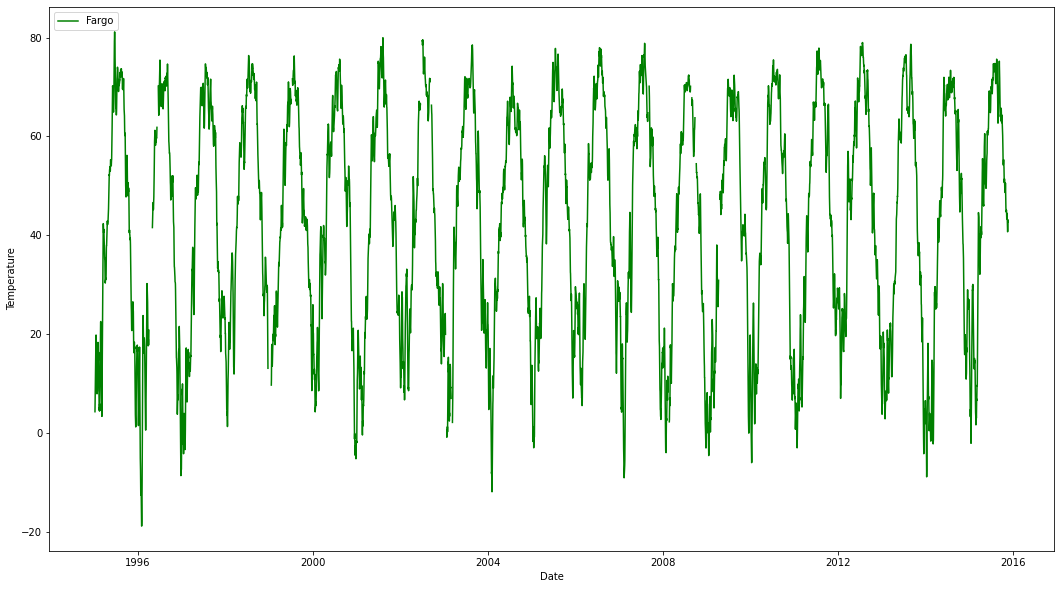

In [23]:
# plot the rolling mean
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(climate_data.index ,climate_data['ND_Fargo_Temp'].rolling(10).mean(),c='g', label='Fargo')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

In [24]:
climate_data_US=climate_data[['ND_Fargo_Temp','Cleveland_Temp', 'Milwaukee_Temp','Vermont_Burlington_Temp']]
climate_data_US.corr()

,ND_Fargo_Temp,Cleveland_Temp,Milwaukee_Temp,Vermont_Burlington_Temp
ND_Fargo_Temp,1.000000,0.863706,0.917432,0.841917
Cleveland_Temp,0.863706,1.000000,0.954922,0.931196
Milwaukee_Temp,0.917432,0.954922,1.000000,0.894101
Vermont_Burlington_Temp,0.841917,0.931196,0.894101,1.000000


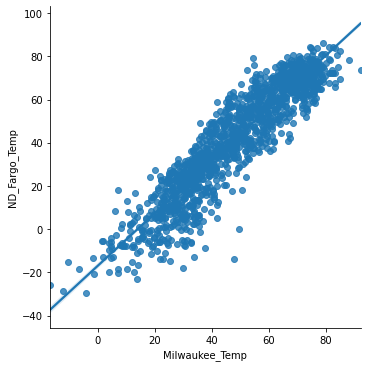

In [25]:
sns.lmplot(x='Milwaukee_Temp', y='ND_Fargo_Temp', data=climate_data_US.loc['1995-01-01':'1998-12-31']);

In [26]:
# The yaer of 2015 does not have a full year temperature data, has to be deleted.
climate_data=climate_data.loc['1995-01-01':'2014-12-31']

In [27]:
#The average temperature of 2010-2014 five years.
Temp1=climate_data.loc['2010-01-01':'2014-12-31'].mean()
Temp1

AK_Anchorage_Temp          37.815608
ND_Fargo_Temp              43.184995
FL_West_Palm_Beach_Temp    75.834228
Vermont_Burlington_Temp    47.978094
TX_El_Paso_Temp            66.925137
Wyoming_Cheyenne_Temp      46.748248
San_Francisco_Temp         57.468565
Cleveland_Temp             51.959255
Milwaukee_Temp             48.665389
Honolulu_Temp              76.998467
Egypt_Cairo                73.158740
India_Delhi                76.987493
China_Beijing              54.583178
Singapore_Temp             82.084055
New_Zealand Auckland       59.919362
Russia_Moscow              43.107781
Argentina Buenos_Aires     63.292442
Peru_Lima                  67.160712
dtype: float64

In [28]:
# The average temperature of 1995-1999 five years.
Temp2=climate_data.loc['1995-01-01':'1999-12-31'].mean()
Temp2

AK_Anchorage_Temp          36.741241
ND_Fargo_Temp              42.215830
FL_West_Palm_Beach_Temp    75.193465
Vermont_Burlington_Temp    46.951322
TX_El_Paso_Temp            65.556860
Wyoming_Cheyenne_Temp      46.019780
San_Francisco_Temp         57.016676
Cleveland_Temp             51.223723
Milwaukee_Temp             48.418810
Honolulu_Temp              77.112740
Egypt_Cairo                71.552805
India_Delhi                76.099064
China_Beijing              55.462164
Singapore_Temp             82.213564
New_Zealand Auckland       59.859560
Russia_Moscow              41.202856
Argentina Buenos_Aires     62.232198
Peru_Lima                  67.997474
dtype: float64

In [29]:
# The temperature difference between 2010-2014 period vs 1995-1999 period. Positive means temperature increase, negative means temperature decrease.
Temp1-Temp2

AK_Anchorage_Temp          1.074367
ND_Fargo_Temp              0.969164
FL_West_Palm_Beach_Temp    0.640763
Vermont_Burlington_Temp    1.026773
TX_El_Paso_Temp            1.368277
Wyoming_Cheyenne_Temp      0.728467
San_Francisco_Temp         0.451889
Cleveland_Temp             0.735532
Milwaukee_Temp             0.246579
Honolulu_Temp             -0.114274
Egypt_Cairo                1.605934
India_Delhi                0.888429
China_Beijing             -0.878986
Singapore_Temp            -0.129509
New_Zealand Auckland       0.059801
Russia_Moscow              1.904925
Argentina Buenos_Aires     1.060245
Peru_Lima                 -0.836762
dtype: float64

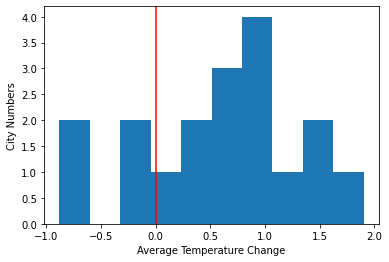

In [30]:
#histogram of the cities and temperature change
plt.hist(Temp1-Temp2)
plt.xlabel('Average Temperature Change')
plt.ylabel('City Numbers')
plt.axvline(0, c='r');

In [31]:
# Calculate the yearly average temperature of each city
climate_yearly=climate_data.groupby(pd.DatetimeIndex(climate_data.index).year).mean()
climate_yearly

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,
1995,37.535890,41.613699,74.837260,47.203836,66.432877,46.085479,57.032877,51.102192,48.361370,78.381918,70.771507,76.937912,55.995342,81.756164,59.684066,42.210411,61.701370,66.744110
1996,35.034153,37.890808,74.457923,45.156510,66.349167,45.212603,57.591279,49.087705,45.534969,77.812022,71.324590,75.754098,54.810656,81.637158,59.464481,40.460383,62.710109,65.080601
1997,38.500274,41.173425,75.423014,44.975616,64.294795,44.896438,58.495068,49.625205,46.518356,77.009863,70.766575,74.457260,55.143014,82.960822,58.703288,40.469863,63.143836,71.930959
1998,37.769806,45.941551,76.226593,48.994737,65.399723,46.732964,56.455402,54.237119,51.526039,76.197784,72.639944,76.405292,55.885042,83.120222,61.254294,40.079224,61.761111,69.502216
1999,34.876923,44.441598,75.035440,48.432692,65.316209,47.182418,55.531593,52.107692,49.883242,76.147527,72.284890,76.956077,55.483242,81.603297,60.208516,42.788462,61.835714,66.750549
2000,38.328962,42.168033,74.788525,45.308197,66.137158,47.156011,56.944262,50.176503,48.004918,76.848087,71.236986,76.595355,54.774317,81.574044,59.891233,42.588525,62.396164,65.701918
2001,37.478082,43.565205,75.055616,47.880548,65.570685,47.400548,56.670959,51.957534,49.334795,77.457143,72.737260,76.148077,54.889863,81.708493,59.790358,41.368219,63.339835,65.169146
2002,39.212188,42.343056,75.782548,47.232222,65.620222,46.317500,56.956667,52.028889,49.038889,77.224167,72.510526,77.388056,55.155956,82.605540,59.515385,41.833795,63.006667,66.223611
2003,39.372877,42.719008,75.689315,45.595317,66.545330,48.034615,57.633516,50.470879,47.240110,77.961157,72.349451,75.866301,54.906301,82.076374,59.297759,41.056438,61.924242,65.731215


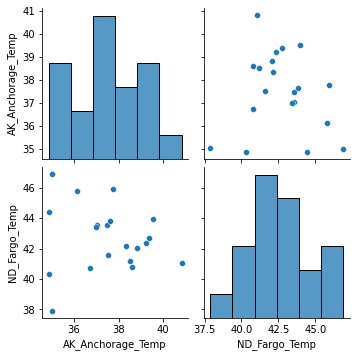

In [32]:
sns.pairplot(climate_yearly, vars=['AK_Anchorage_Temp','ND_Fargo_Temp'], kind ='scatter' );

In [33]:
climate_yearly.describe()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,37.516320,42.712163,75.456116,46.980957,66.060014,46.663223,57.123757,51.381259,48.519397,77.243659,72.457321,76.688065,55.154375,82.092976,59.696745,42.177970,62.679876,66.979051
std,1.707870,2.164381,0.784476,1.410156,0.891764,1.133451,1.133512,1.417282,1.827179,0.666925,1.099416,0.809866,0.885757,0.487037,0.667912,1.235075,0.684307,1.605416
min,34.859341,37.890808,73.667123,44.975616,64.294795,44.876648,55.531593,49.087705,45.188219,76.147527,70.766575,74.457260,53.156986,81.561370,58.546721,40.079224,61.321429,65.080601
25%,36.582194,41.137123,75.006056,45.758101,65.492651,45.863288,56.448450,50.472583,47.228091,76.718493,71.993425,76.340614,54.782072,81.695778,59.251514,41.290274,62.214691,66.050133
50%,37.585616,42.531032,75.451339,46.981644,66.187209,46.587441,56.882845,51.201233,48.585342,77.345467,72.429988,76.704865,55.024658,81.983014,59.706181,42.152055,62.795329,66.701644
75%,38.667647,43.846164,75.819720,47.974795,66.460990,47.299112,57.593391,52.148235,49.471906,77.709101,72.752808,77.036730,55.658555,82.411735,60.133910,43.350068,63.166712,67.492102
max,40.821096,46.900000,77.240822,49.840437,67.836885,49.287978,60.800274,54.237119,51.997541,78.381918,75.511507,78.006371,56.824451,83.120222,61.254294,44.178297,63.725137,71.930959


In [34]:
# calculate the monthly average temperature of each city.
climate_m=climate_data.groupby(pd.DatetimeIndex(climate_data.index).to_period('M')).mean()
climate_m

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,
1995-01,16.261290,11.283871,63.751613,28.219355,46.709677,29.890323,51.890323,30.325806,24.996774,73.606452,56.600000,55.548387,30.100000,80.351613,67.016129,19.796774,73.351613,74.780645
1995-02,21.246429,13.082143,64.850000,19.696429,56.246429,32.875000,53.146429,26.860714,25.703571,73.017857,59.485714,62.367857,35.642857,79.692857,68.175000,28.796429,71.182143,74.650000
1995-03,18.525806,28.377419,71.412903,35.119355,60.416129,37.090323,53.638710,40.561290,37.870968,74.961290,64.477419,70.360000,45.835484,81.761290,65.693548,31.690323,69.745161,73.100000
1995-04,40.026667,38.523333,75.426667,40.633333,65.646667,39.253333,54.273333,46.496667,43.356667,75.420000,67.040000,83.113333,58.256667,82.440000,64.196667,46.906667,62.100000,68.253333
1995-05,48.625806,55.212903,80.658065,56.545161,75.848387,44.945161,55.383871,59.435484,57.254839,77.477419,74.177419,93.187097,67.667742,83.500000,57.506452,56.548387,55.632258,66.319355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08,58.125806,69.525806,83.416129,68.522581,79.335484,66.109677,65.096774,70.267742,69.503226,81.625806,85.216129,88.693548,78.206452,81.903226,52.916129,65.922581,57.296774,61.625806
2014-09,50.740000,60.453333,80.956667,62.190000,74.980000,59.970000,66.356667,63.510000,61.936667,82.110000,83.030000,85.550000,68.810000,83.396667,55.910000,53.870000,59.213333,61.776667
2014-10,34.822581,48.109677,78.261290,53.525806,69.183871,50.954839,67.083871,53.580645,51.319355,80.809677,75.312903,79.793548,56.148387,83.170968,57.893548,37.787097,66.725806,63.893548


In [35]:
climate_m.describe()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,37.443434,42.585744,75.414524,46.872960,66.000723,46.569967,57.101549,51.284373,48.412934,77.225875,72.403296,76.654769,55.046475,82.090405,59.744436,42.060959,62.721950,67.013185
std,15.661568,22.380868,6.234317,17.971251,14.097202,15.058094,4.583896,16.526635,17.468309,2.968825,9.656393,12.607200,19.364662,1.335813,5.661413,18.024447,8.874501,4.829360
min,3.361290,-1.096774,58.790323,9.451613,40.125806,21.922581,47.874074,19.285714,14.400000,71.596429,54.667742,52.183871,19.574194,79.148387,49.296667,4.745161,45.432258,58.846667
25%,23.840092,23.089315,70.914167,30.150000,54.065417,32.864315,53.236607,36.137661,32.689377,74.611290,62.837183,65.311667,37.397500,81.099167,55.321413,27.047231,55.161344,62.766935
50%,37.500000,44.833871,76.530000,47.001613,66.428871,44.870968,57.409785,51.941129,48.449785,77.340000,72.941505,79.795108,57.418333,82.145161,59.343602,42.289032,62.732366,66.767043
75%,53.068333,63.090833,81.015323,63.916667,79.368548,60.146667,60.963548,67.057500,64.840000,79.764167,81.491667,87.052419,73.568145,83.036667,65.111320,59.394167,71.065709,71.316129
max,62.080645,77.245161,84.870968,74.593548,88.883333,75.138710,67.083871,78.248387,78.454839,82.706452,87.422581,97.056667,84.858065,85.164516,71.478571,78.851613,78.758065,80.132143


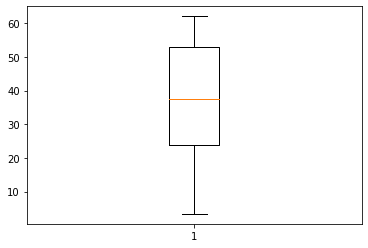

In [36]:
plt.boxplot(climate_m['AK_Anchorage_Temp']);

In [37]:
# Choose US cities
USclimate_m=climate_m[['AK_Anchorage_Temp','ND_Fargo_Temp','FL_West_Palm_Beach_Temp','Vermont_Burlington_Temp','TX_El_Paso_Temp','Wyoming_Cheyenne_Temp', 'San_Francisco_Temp', 'Cleveland_Temp', 'Milwaukee_Temp', 'Honolulu_Temp']]

In [38]:
USclimate_m.corr()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp
AK_Anchorage_Temp,1.000000,0.931316,0.877847,0.928933,0.931084,0.921822,0.820066,0.923279,0.918748,0.794290
ND_Fargo_Temp,0.931316,1.000000,0.907099,0.980360,0.946658,0.958919,0.841918,0.983516,0.986930,0.827009
FL_West_Palm_Beach_Temp,0.877847,0.907099,1.000000,0.925535,0.892451,0.877856,0.825962,0.932812,0.922006,0.847229
Vermont_Burlington_Temp,0.928933,0.980360,0.925535,1.000000,0.943335,0.950665,0.847357,0.992242,0.986053,0.852212
TX_El_Paso_Temp,0.931084,0.946658,0.892451,0.943335,1.000000,0.948322,0.834700,0.941061,0.934348,0.781903
Wyoming_Cheyenne_Temp,0.921822,0.958919,0.877856,0.950665,0.948322,1.000000,0.852787,0.954063,0.962193,0.824039
San_Francisco_Temp,0.820066,0.841918,0.825962,0.847357,0.834700,0.852787,1.000000,0.836007,0.847915,0.861671
Cleveland_Temp,0.923279,0.983516,0.932812,0.992242,0.941061,0.954063,0.836007,1.000000,0.993471,0.845903
Milwaukee_Temp,0.918748,0.986930,0.922006,0.986053,0.934348,0.962193,0.847915,0.993471,1.000000,0.851449
Honolulu_Temp,0.794290,0.827009,0.847229,0.852212,0.781903,0.824039,0.861671,0.845903,0.851449,1.000000


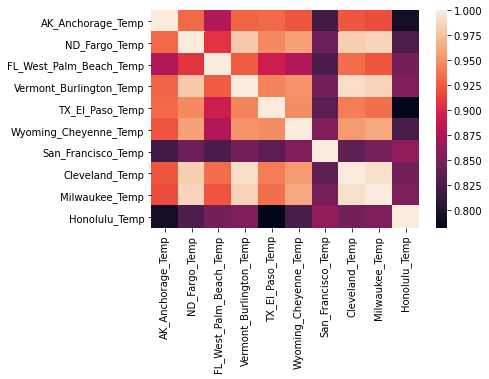

In [39]:
#Relathionshio of US cities temperature
sns.heatmap(USclimate_m.corr());

In [40]:
# Non US cities
Wclimate_m=climate_m[['Egypt_Cairo', 'India_Delhi', 'China_Beijing', 'Singapore_Temp','New_Zealand Auckland', 'Russia_Moscow', 'Argentina Buenos_Aires', 'Peru_Lima']]
Wclimate_m.corr()

,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Egypt_Cairo,1.000000,0.893596,0.952519,0.642498,-0.928056,0.931265,-0.942201,-0.786757
India_Delhi,0.893596,1.000000,0.944950,0.773056,-0.812313,0.896969,-0.899486,-0.619081
China_Beijing,0.952519,0.944950,1.000000,0.688420,-0.905259,0.958840,-0.958611,-0.713559
Singapore_Temp,0.642498,0.773056,0.688420,1.000000,-0.542121,0.618132,-0.660109,-0.281725
New_Zealand Auckland,-0.928056,-0.812313,-0.905259,-0.542121,1.000000,-0.907015,0.901076,0.808782
Russia_Moscow,0.931265,0.896969,0.958840,0.618132,-0.907015,1.000000,-0.937476,-0.717927
Argentina Buenos_Aires,-0.942201,-0.899486,-0.958611,-0.660109,0.901076,-0.937476,1.000000,0.735531
Peru_Lima,-0.786757,-0.619081,-0.713559,-0.281725,0.808782,-0.717927,0.735531,1.000000


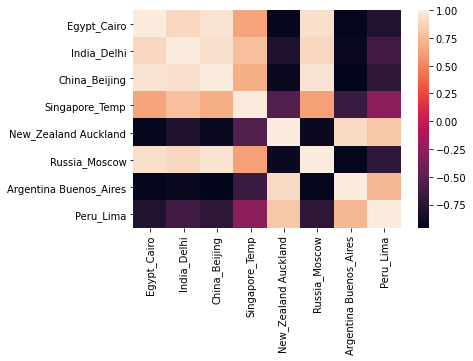

In [41]:
# Temperature relationship of non-US cities
sns.heatmap(Wclimate_m.corr())

In [42]:
climate_m.index=climate_m.index.to_timestamp();

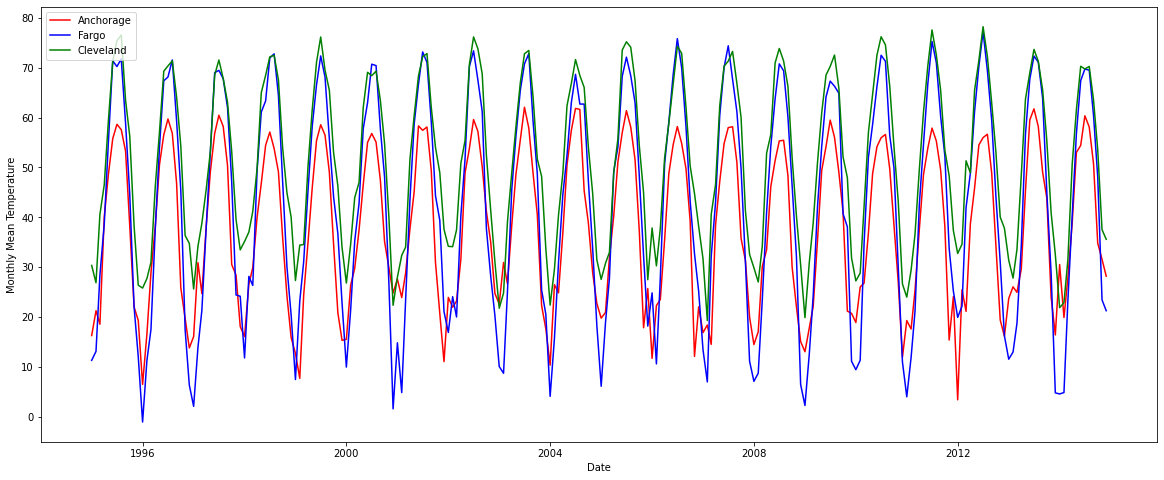

In [43]:
#Plot of monthly temperature of cities
plt.figure(figsize=(20, 8))
plt.plot(climate_m.index,climate_m['AK_Anchorage_Temp'], c='r', label='Anchorage')
plt.plot(climate_m.index,climate_m['ND_Fargo_Temp'], c ='b', label="Fargo")
plt.plot(climate_m.index,climate_m['Cleveland_Temp'], c ='g', label="Cleveland")
plt.xlabel('Date')
plt.ylabel('Monthly Mean Temperature')
plt.legend(loc='upper left')
plt.show()

In [45]:
#Januray temperature 
climate_m1=climate_m[pd.DatetimeIndex(climate_m.index).month==1]
climate_m1

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,
1995-01-01,16.261290,11.283871,63.751613,28.219355,46.709677,29.890323,51.890323,30.325806,24.996774,73.606452,56.600000,55.548387,30.100000,80.351613,67.016129,19.796774,73.351613,74.780645
1996-01-01,6.454839,-1.096774,65.480645,18.064516,47.641935,23.996774,51.483871,25.790323,21.703226,75.538710,57.490323,56.667742,27.838710,79.148387,68.406452,11.983871,74.854839,71.654839
1997-01-01,16.061290,2.051613,66.632258,19.180645,44.458065,25.116129,50.854839,25.606452,20.261290,71.874194,58.812903,54.309677,23.574194,80.832258,64.983871,16.745161,77.693548,72.229032
1998-01-01,16.064516,11.764516,68.245161,22.864516,47.500000,30.603226,52.596774,35.125806,27.548387,71.719355,58.251613,55.225806,25.032258,82.551613,67.509677,21.677419,71.635484,79.203226
1999-01-01,12.653333,7.430000,68.640000,19.703333,49.106667,30.963333,49.420000,27.313333,21.030000,73.033333,58.356667,55.150000,28.856667,80.103333,70.376667,22.756667,71.466667,71.533333
2000-01-01,15.503226,9.932258,65.603226,18.145161,49.890323,30.509677,52.196774,26.803226,23.980645,71.912903,55.983871,56.229032,19.574194,79.558065,66.206452,18.877419,77.641935,71.290323
2001-01-01,27.593548,14.809677,60.396774,21.303226,42.080645,27.925806,49.087097,28.000000,24.990323,75.087097,59.003226,54.258065,21.480645,79.725806,65.803226,22.706452,76.035484,71.051613
2002-01-01,23.909677,16.883871,67.106452,28.261290,46.696774,27.990323,49.170968,34.164516,30.577419,74.000000,54.667742,56.106452,32.600000,80.748387,66.787097,22.064516,74.932258,70.051613
2003-01-01,22.600000,10.040000,59.854839,12.593333,48.764516,35.212903,53.625806,21.741935,20.538710,72.829032,61.229032,52.183871,26.480645,80.086667,66.046667,17.545161,75.793548,72.053333


In [46]:
climate_m1.describe()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,16.943957,9.506242,65.859097,20.596608,46.495495,29.221070,50.696645,28.059538,23.470694,73.366183,58.246382,55.458952,25.844446,80.234016,67.224145,18.427027,75.482043,72.815785
std,6.692473,6.414638,3.106855,5.234145,2.542238,3.389665,1.718551,4.849626,4.750811,1.072807,2.164208,1.353006,3.466296,0.810584,1.379457,5.118782,1.914035,1.940397
min,3.361290,-1.096774,59.854839,9.451613,42.080645,22.777419,47.977419,19.841935,14.400000,71.719355,54.667742,52.183871,19.574194,79.148387,64.983871,4.745161,71.466667,70.051613
25%,12.923011,4.416129,64.992742,18.098387,44.857258,27.861290,49.357742,25.198387,20.821774,72.704839,56.854032,54.944758,23.172581,79.649194,66.166505,16.468548,74.669355,71.624462
50%,16.162903,9.672581,65.979032,20.503280,46.990323,29.898387,50.772581,27.422796,22.924194,73.295699,58.365430,55.335484,26.091935,80.125860,67.029032,19.172581,75.779032,72.370968
75%,20.466129,12.178226,67.390323,23.428226,48.420161,30.840833,51.614516,31.454839,25.634677,74.087097,59.596774,56.125000,28.185484,80.554839,68.014516,21.774194,76.590323,73.591935
max,30.512903,24.832258,71.848387,28.845161,49.890323,35.274194,54.300000,37.848387,34.264516,75.538710,62.848387,58.574194,32.600000,82.551613,70.376667,27.551613,78.758065,79.203226


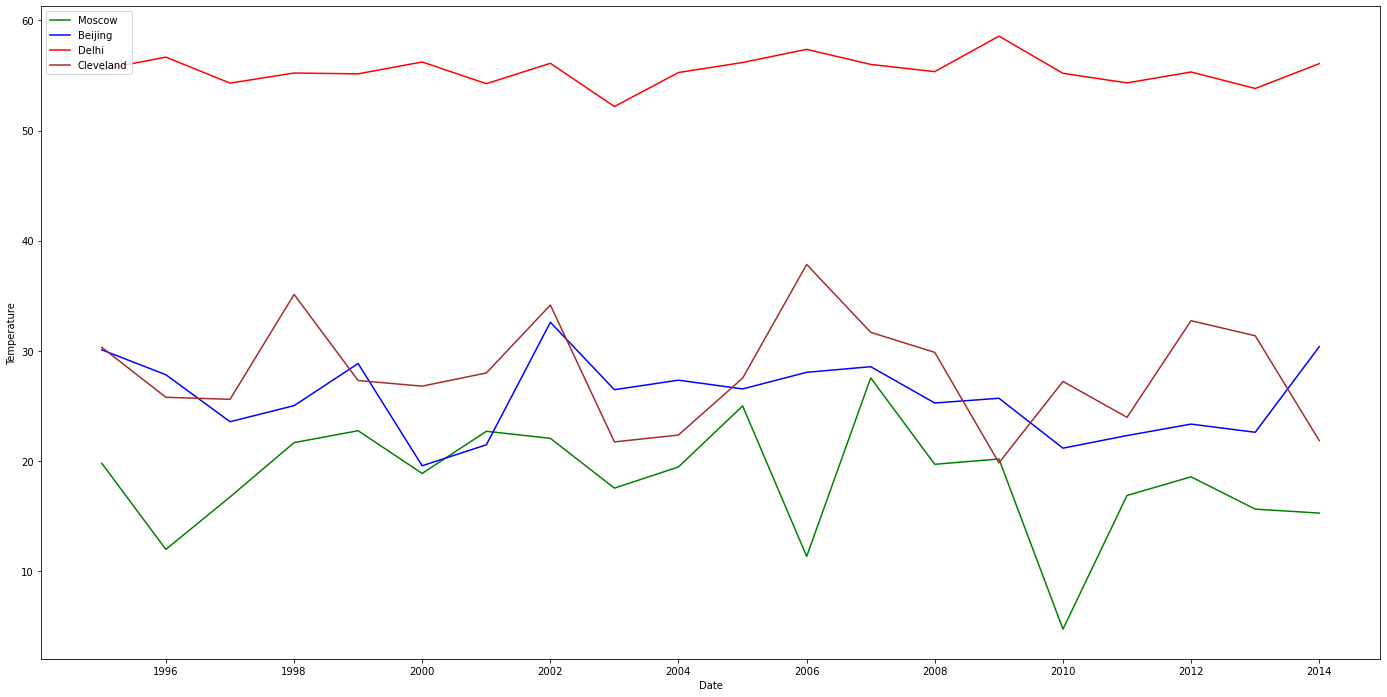

In [47]:
#show the Januaray temperature of some cities from 1995 to 2014
fig, ax = plt.subplots(figsize=(24,12))
ax.plot(climate_m1.index ,climate_m1['Russia_Moscow'],c='g', label='Moscow')
ax.plot(climate_m1.index ,climate_m1['China_Beijing'],c='b', label='Beijing')
ax.plot(climate_m1.index ,climate_m1['India_Delhi'],c='r', label='Delhi')
ax.plot(climate_m1.index ,climate_m1['Cleveland_Temp'],c='brown', label='Cleveland')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()

In [48]:
climate_m7=climate_m[pd.DatetimeIndex(climate_m.index).month==7]
climate_m7

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
Date,,,,,,,,,,,,,,,,,,
1995-07-01,58.654839,70.245161,81.441935,74.593548,83.483871,67.832258,63.161290,75.435484,74.083871,81.977419,83.438710,88.974194,78.622581,82.535484,51.100000,62.354839,49.006452,60.883871
1996-07-01,59.725806,68.148387,82.958065,68.964516,82.970968,68.083871,61.438710,70.370968,69.348387,81.041935,81.654839,87.045161,77.748387,83.138710,51.761290,65.083871,46.735484,59.509677
1997-07-01,60.477419,69.487097,82.006452,69.103226,82.780645,68.141935,61.896774,71.561290,69.129032,80.503226,83.741935,87.864516,82.603226,84.038710,50.061290,65.609677,53.987097,72.135484
1998-07-01,57.100000,71.974194,83.183871,69.077419,82.483871,69.409677,60.600000,72.183871,72.561290,78.532258,84.390323,87.458065,79.551613,82.687097,55.864516,64.596774,53.496774,64.080645
1999-07-01,58.561290,72.380000,82.587097,74.029032,80.490323,69.348387,59.829032,76.177419,76.490323,78.212903,83.558065,88.119355,82.322581,82.022581,52.229032,70.196774,49.177419,62.067742
2000-07-01,56.809677,70.719355,81.048387,67.219355,84.329032,72.380645,59.609677,68.416129,68.045161,79.945161,84.980645,85.777419,84.858065,82.716129,55.158065,65.354839,46.948387,61.967742
2001-07-01,57.448387,73.180645,81.006452,68.254839,84.109677,71.774194,60.635484,72.222581,72.325806,80.500000,83.945161,87.000000,80.377419,83.138710,49.429032,71.503226,50.306452,60.229032
2002-07-01,59.616129,73.396774,81.693548,71.212903,81.877419,74.177419,62.258065,76.190323,75.951613,79.880645,86.935484,94.416129,80.774194,83.216129,51.621429,72.041935,50.019355,60.245161
2003-07-01,62.080645,70.783871,83.090323,71.764516,84.851613,75.138710,60.987097,72.819355,71.038710,81.387097,83.677419,85.538710,78.567742,82.780645,49.296667,68.387097,48.970968,61.919355


In [49]:
climate_m7.describe()

,AK_Anchorage_Temp,ND_Fargo_Temp,FL_West_Palm_Beach_Temp,Vermont_Burlington_Temp,TX_El_Paso_Temp,Wyoming_Cheyenne_Temp,San_Francisco_Temp,Cleveland_Temp,Milwaukee_Temp,Honolulu_Temp,Egypt_Cairo,India_Delhi,China_Beijing,Singapore_Temp,New_Zealand Auckland,Russia_Moscow,Argentina Buenos_Aires,Peru_Lima
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,58.834677,71.833032,82.448226,71.027258,83.222581,70.226774,61.599032,73.378871,72.466935,80.328548,84.301129,88.198065,80.354839,82.701774,51.863969,67.600968,50.226129,62.933548
std,2.071086,2.607244,1.072704,2.348543,1.867795,2.519346,1.418518,2.753524,3.172694,1.225013,1.349182,2.011495,1.901441,0.721942,1.681813,4.045669,2.801249,3.046425
min,55.319355,67.319355,80.700000,67.219355,79.474194,65.309677,59.609677,68.416129,68.045161,78.212903,81.654839,85.538710,77.451613,81.196774,49.296667,62.354839,45.432258,59.509677
25%,57.361290,70.121774,81.928226,69.049194,82.029839,68.127419,60.629839,71.506452,69.293548,79.578226,83.528226,87.122581,79.135484,82.087903,50.922581,65.110484,48.790323,60.771774
50%,58.608065,72.054839,82.317742,71.312903,83.191935,69.983871,61.154839,73.256452,72.266129,80.459677,84.304839,87.846774,80.008065,82.701613,51.743548,65.695161,49.966129,62.017742
75%,60.395161,73.234677,82.991129,73.040323,84.358065,71.996774,62.545161,75.620968,75.329032,81.282258,84.825806,89.108065,81.575000,83.158065,52.325000,69.962097,52.026613,64.364516
max,62.080645,77.245161,84.870968,74.593548,86.580645,75.138710,65.219355,78.248387,78.454839,82.312903,86.935484,94.416129,84.858065,84.038710,55.864516,78.851613,55.212903,72.135484


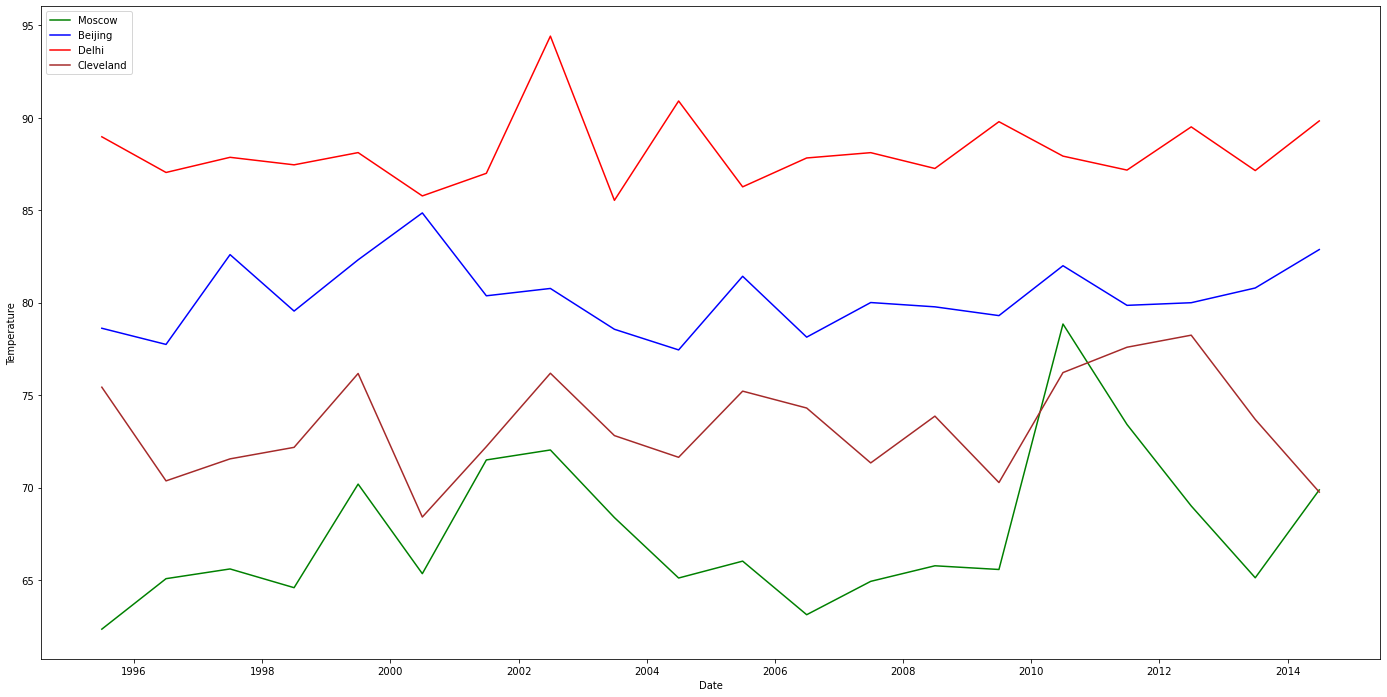

In [50]:
#Show the July temperature of some cities from 1995 to 2014
fig, ax = plt.subplots(figsize=(24,12))
ax.plot(climate_m7.index ,climate_m7['Russia_Moscow'],c='g', label='Moscow')
ax.plot(climate_m7.index ,climate_m7['China_Beijing'],c='b', label='Beijing')
ax.plot(climate_m7.index ,climate_m7['India_Delhi'],c='r', label='Delhi')
ax.plot(climate_m7.index ,climate_m7['Cleveland_Temp'],c='brown', label='Cleveland')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend(loc='upper left')
plt.show()